<a href="https://colab.research.google.com/github/Clairekmkim/Clairekmkim/blob/main/Fashion_MNIST_Classification_using_Deep_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


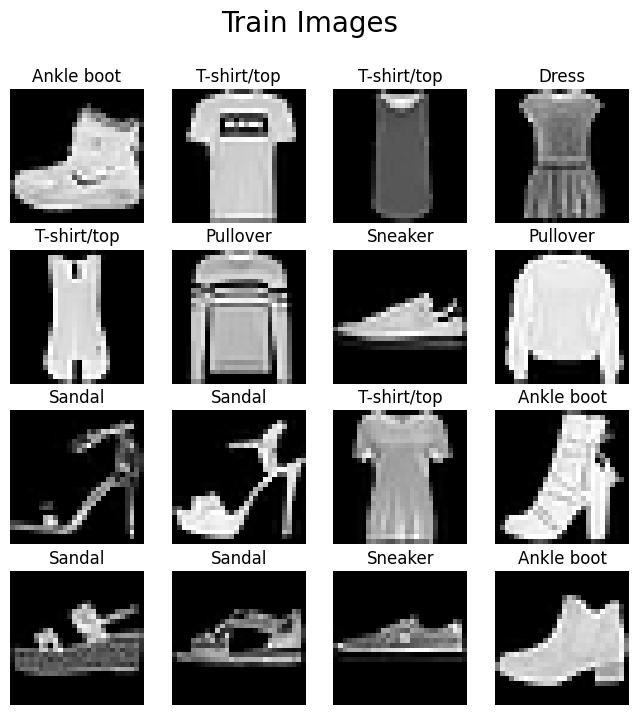

Epoch 1/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.7221 - loss: 0.8162 - val_accuracy: 0.8394 - val_loss: 0.4506
Epoch 2/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8514 - loss: 0.4208 - val_accuracy: 0.8606 - val_loss: 0.3957
Epoch 3/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8648 - loss: 0.3722 - val_accuracy: 0.8625 - val_loss: 0.3835
Epoch 4/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8744 - loss: 0.3465 - val_accuracy: 0.8682 - val_loss: 0.3681
Epoch 5/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8808 - loss: 0.3214 - val_accuracy: 0.8743 - val_loss: 0.3510
Epoch 6/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8863 - loss: 0.3130 - val_accuracy: 0.8733 - val_loss: 0.3567
Epoch 7/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8936 - loss: 0.2925 - val_accuracy: 0.8787 - val_loss: 0.3346
Epoch 8/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8956 - loss: 0.2798 - val_accuracy: 0

In [14]:
# Import fashion_mnist dataset from tensorflow keras
from tensorflow.keras.datasets import fashion_mnist

# Import utility to convert numbers to categorical format (one-hot encoding)
from tensorflow.keras.utils import to_categorical

# Import Sequential model class for creating neural networks
from tensorflow.keras.models import Sequential

# Import Dense (fully connected) and Flatten layers
from tensorflow.keras.layers import Dense, Flatten

# Import confusion_matrix for evaluation metrics
from sklearn.metrics import confusion_matrix

# Import matplotlib for plotting and visualization (with alias 'plt')
import matplotlib.pyplot as plt

# Import pandas library for data manipulation and analysis (with alias 'pd')
import pandas as pd

# Import numpy for numerical computations (with alias 'np')
import numpy as np

# Load Fashion MNIST dataset and split into training and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# x_train: training images (60,000 images, 28x28 pixels)
# y_train: training labels (60,000 labels)
# x_test: test images (10,000 images, 28x28 pixels)
# y_test: test labels (10,000 labels)

# Print shapes to verify data dimensions
print("Training data shape:", x_train.shape)    # Should show (60000, 28, 28)
print("Training labels shape:", y_train.shape)  # Should show (60000,)
print("Test data shape:", x_test.shape)        # Should show (10000, 28, 28)
print("Test labels shape:", y_test.shape)      # Should show (10000,)

# The Fashion MNIST dataset contains 10 classes:
# 0: T-shirt/top
# 1: Trouser
# 2: Pullover
# 3: Dress
# 4: Coat
# 5: Sandal
# 6: Shirt
# 7: Sneaker
# 8: Bag
# 9: Ankle boot

# Create a dictionary that maps label numbers to clothing item names
item = {
   0: 'T-shirt/top',    # Label 0 represents T-shirt or top
   1: 'Trouser',        # Label 1 represents Trousers
   2: 'Pullover',       # Label 2 represents Pullovers
   3: 'Dress',          # Label 3 represents Dresses
   4: 'Coat',           # Label 4 represents Coats
   5: 'Sandal',         # Label 5 represents Sandals
   6: 'Shirt',          # Label 6 represents Shirts
   7: 'Sneaker',        # Label 7 represents Sneakers
   8: 'Bag',            # Label 8 represents Bags
   9: 'Ankle boot'      # Label 9 represents Ankle boots
}

# You can use this dictionary to convert numeric labels to readable names
# Example usage:
# print("Label 0 is:", item[0])  # Will print "Label 0 is: T-shirt/top"

# This dictionary is useful for:
# 1. Displaying prediction results in human-readable form
# 2. Creating labels for visualization
# 3. Making confusion matrix more readable

# Create a figure with size 8x8 inches
plt.figure(figsize=(8, 8))

# Loop through 16 training images to display them
for i in range(16):
   # Create a 4x4 grid of subplots, add images one by one
   plt.subplot(4, 4, i+1)

   # Set the title for each image (shows the item name)
   plt.title(item[y_train[i]])

   # Display the image in grayscale
   plt.imshow(x_train[i], cmap=plt.cm.gray)

   # Remove axes for cleaner visualization
   plt.axis("off")

# Show the entire figure with all subplots
plt.suptitle('Train Images', fontsize=20)
plt.show()

# This code will:
# 1. Create a 4x4 grid of images from the training set
# 2. Label each image with its corresponding clothing item name
# 3. Display images in grayscale
# 4. Remove axes for better visualization
# 5. Add a main title 'Train Images'

# Convert training data to 32-bit float type
x_train = x_train.astype('float32')
# Normalize training data to range [0,1] by dividing by 255
x_train = x_train/255

# Convert test data to 32-bit float type
x_test = x_test.astype('float32')
# Normalize test data to range [0,1] by dividing by 255
x_test = x_test/255

# This preprocessing does two things:
# 1. Changes data type to float32 for better precision
# 2. Normalizes pixel values from [0,255] to [0,1]

# Convert training labels to one-hot vectors
y_onehot_train = to_categorical(y_train, num_classes=10)

# Convert test labels to one-hot vectors
y_onehot_test = to_categorical(y_test, num_classes=10)

# Example of one-hot encoding:
# Original label: 3 (Dress)
# One-hot vector: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

# Set hyperparameters for the neural network
OUTPUT_SHAPE = 10    # Number of output classes (10 types of clothing)
BATCH_SIZE = 128    # Number of training examples used in one iteration
EPOCHS = 10        # Number of complete passes through the training dataset
VERBOSE = 1        # Controls the amount of logging output (1 = show progress bar)

# 하이퍼파라미터란:
## 모델 학습 전에 미리 설정하는 값들
## 모델이 스스로 학습하지 않는 매개변수
## 성능 최적화를 위해 수동으로 조정 필요

# 실생활 비유:
## OUTPUT_SHAPE: 시험에서 몇 개의 선택지를 줄 것인가
## BATCH_SIZE: 한 번에 몇 페이지씩 공부할 것인가
## EPOCHS: 전체 교과서를 몇 번 반복해서 볼 것인가
## VERBOSE: 학습 진행 상황을 얼마나 자세히 기록할 것인가


# Explanation of each hyperparameter:
# 1. OUTPUT_SHAPE = 10:
#    - Matches the number of clothing categories
#    - Must match the size of one-hot encoded labels

# 2. BATCH_SIZE = 128:
#    - Data is processed in batches of 128 images
#    - Larger batch = faster training but more memory
#    - Smaller batch = slower but better generalization

# 3. EPOCHS = 10:
#    - Model will see entire dataset 10 times
#    - More epochs = more learning time
#    - Too many epochs might cause overfitting

# 4. VERBOSE = 1:
#    - 0 = silent
#    - 1 = progress bar
#    - 2 = one line per epoch

# Create a sequential model
model = Sequential([
   # Flatten 2D image (28x28) to 1D array (784)
   Flatten(),

   # First hidden layer: 128 neurons with ReLU activation
   Dense(128, activation='relu'),

   # Second hidden layer: 64 neurons with ReLU activation
   Dense(64, activation='relu'),

   # Output layer: 10 neurons (one per class) with softmax activation
   Dense(10, activation='softmax')
])

# Layer explanation:
# 1. Flatten():
#    - Converts 2D image array (28x28) to 1D array (784)
#    - Like unrolling a sheet of paper

# 2. Dense(128, activation='relu'):
#    - 128 neurons in first hidden layer
#    - ReLU: keeps positive values, converts negatives to zero
#    - Like initial feature detection

# 3. Dense(64, activation='relu'):
#    - 64 neurons in second hidden layer
#    - Further refines features
#    - Reduces dimensionality

# 4. Dense(10, activation='softmax'):
#    - 10 output neurons (one per clothing type)
#    - Softmax: converts outputs to probabilities that sum to 1
#    - Like making final prediction

# Compile the model with specified settings
model.compile(
   optimizer='adam',               # Optimization algorithm
   loss='categorical_crossentropy', # Loss function for classification
   metrics=['accuracy']            # Metric to monitor during training
)

# Detailed explanation:
# 1. optimizer='adam':
#    - Adam: Adaptive Moment Estimation
#    - Automatically adjusts learning rate
#    - Popular choice for deep learning
#    - Like an intelligent teacher adjusting teaching speed

# 2. loss='categorical_crossentropy':
#    - Measures how wrong the predictions are
#    - Suitable for multi-class classification
#    - Used when targets are one-hot encoded
#    - Like grading system for model's predictions

# 3. metrics=['accuracy']:
#    - Track how often predictions are correct
#    - Easy to understand: 0.95 = 95% accurate
#    - Shows model's performance during training

# Train the model and store training history
history = model.fit(
   x_train, y_onehot_train,       # Training data and labels
   epochs=EPOCHS,                  # Number of training cycles
   batch_size=BATCH_SIZE,         # Images per batch
   verbose=VERBOSE,               # Progress display level
   validation_split=0.3           # Use 30% of data for validation
)

# Training output explanation:
# Epoch 1/10
# loss: 0.5964 - accuracy: 0.7938       # Training metrics
# val_loss: 0.4447 - val_accuracy: 0.8439  # Validation metrics

# Epoch 2/10
# loss: 0.4124 - accuracy: 0.8538
# val_loss: 0.4134 - val_accuracy: 0.8531

# Epoch 3/10
# loss: 0.3728 - accuracy: 0.8658
# val_loss: 0.3737 - val_accuracy: 0.8656

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_onehot_test)  # Returns loss and accuracy

print(f"Test Loss: {test_loss:.4f}")      # 0.3568
print(f"Test Accuracy: {test_accuracy:.4f}")  # 0.8759

# This means:
# - Loss: 0.3568 (smaller is better)
# - Accuracy: 87.59% correct predictions

# Make predictions on test data
y_pred_enc = model.predict(x_test)  # Get predicted probabilities
y_pred = [np.argmax(i) for i in y_pred_enc]  # Convert to class labels

# Create confusion matrix
matrix = confusion_matrix(y_test, y_pred)  # Compare true vs predicted labels

# Convert matrix to pandas DataFrame for better visualization
df = pd.DataFrame(matrix)  # Create DataFrame from matrix
df.columns = item.values()  # Set column names as clothing items
df.index = item.values()    # Set row names as clothing items

# Display the confusion matrix
print(df)

# This code:
# 1. Makes predictions on test images
# 2. Converts probability predictions to class labels
# 3. Creates a confusion matrix
# 4. Formats it as a readable table